# <center> NANOGrav Pulsar Signal Simulator</center> #
## <center> IPTA 2017 Meeting: Sevres, France </center> ##
## <center> Jeffrey S. Hazboun, UTRGV </center> ##

<img src="./Fresnel.png" style="width: 300px;"/>

### <center> Including: JSH, Michael Lam, Nathan Garver-Daniels, Paul Brooks, Paul Baker, Pete Gentile, Luo Jing, Megan De Cesar, Jim Cordes, Joe Lazio, _Amelia Henkel (REU)_ , _Cassidy Wagner (REU)_ </center> ###

*If I forgot your name, show up to the telecons more often. 

## <center> Why a pulsar signal simulator? </center> ##

<img src="./FPS3_ShiDai.pdf#page=3" style="width: 400px;"/>

1. Definitely not the first ones to think of this...

## Simulator Summary ##

1. Simulate Pulsar Signals (NANOGrav Effort: Since Jan 2017)
    * ISM (IISM) has been the priority.
    * Timing is the next process on the list. (PINT)
    * Optimistic view is for use in a full simulation.
2. Teach people (students) about pulsar signals.
    * "Explore Mode"
    * Show students Baseband data!
    * Outreach
3. Many other use ideas:
    * Mock Data Challenge?
    * Testing search pipelines.
    * FRBs.
    * Highly relativistic binary timing models. 
    * Testing Telescope use for pulsars.

 ## Design ##
 1. Designed for __YOU__ to use it!! It's the skeleton for what you need. 
 <img src="./centaur-skeleton.jpg" style="width: 300px;"/>
 2. Python Based (Python 3, with backwards compatibility).
     * But really Python 2? Get over it they're just parenthesis.
 3. Git version control. 
     * Code is on GitHub. https://github.com/PsrSigSim
     * Example notebooks on GitHub.
     * Well documented. 
     * Unit tests with Version 1.0 release.
 4. Modular design. 
     * Allow for user to add their "tweak" at any point in the simulation.
 5. PSRFITS or Python Array output
 6. Optimized simulation mode
     * Take `.par` or other input files (`.src`).
 7. Will connect to the NANOGrav API for data
     * IPTA API ? (Which will be brought to us, from on high, by the mythical IPTA Post Doc.)

<img src="./Architecture.pdf" style="width: 700px;" />
<img src="./Architecture_Meta.pdf" style="width: 700px;" />

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Import the usual suspects.
import numpy as np
import scipy as sp
from matplotlib.pyplot import *
%matplotlib inline

# Load the Simulator (If you work on it then you can help me name it!!)
# No Steve, it will not be Star Trek themed!
import VersionZeroPointZero as PSS

In [3]:
# Some helpful redefinitions for Matplotlib
rcParams['figure.figsize'] = (6.0,4.0)
rcParams.update({'font.size': 14})
Cmap = cm.afmhot
Cmap.set_bad(color='k',alpha=1.0)

In [4]:
# I'll put this little gem into the simulator next later. 
def ProfilePlot(array, step=1, N=10,Title='Profile by Frequency Channel'):
    try:
        array_len = len(N)
        jj = 0
        for ii, jj in enumerate(N):
            plot(array[jj,:]+ii*(step),c='k')
        n=len(N)
    except:
        Freq_channels = len(array[:,0])
        Freq_step = int(Freq_channels//N)
        for ii in range(N):
            plot(array[ii*Freq_step,:]+ii*(step),c='k')
        n=N
    title(Title)
    xlabel('Phase')
    ylabel('Frequency Channel')
    xticks([])
    yticks([])
    xlim(0,len(array[0,:]))
    ylim(0,n*step+0.1)
    show()

# Okay, start paying attention again. 

In [5]:
#Simple instantiation. 
S = PSS.Signal()
P = PSS.Pulsar(S)

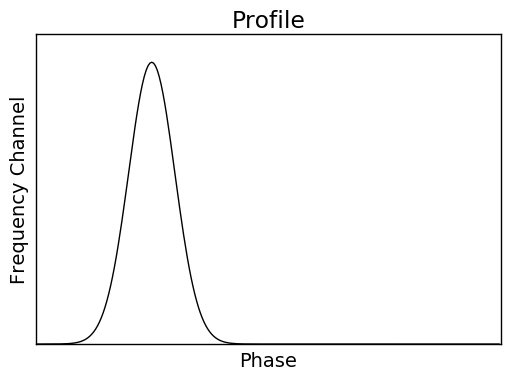

In [6]:
ProfilePlot(P.profile,N=1,Title='Profile')

In [7]:
P.make_pulses()

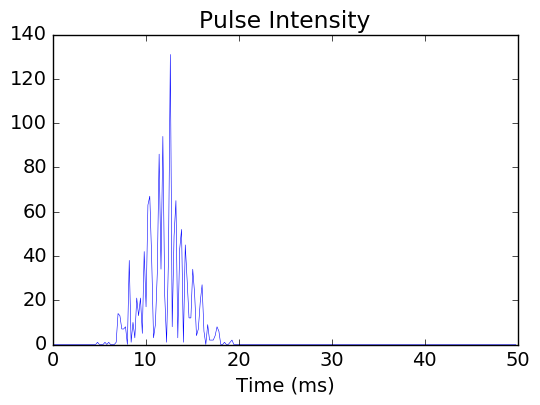

In [8]:
S.pulse_plot()

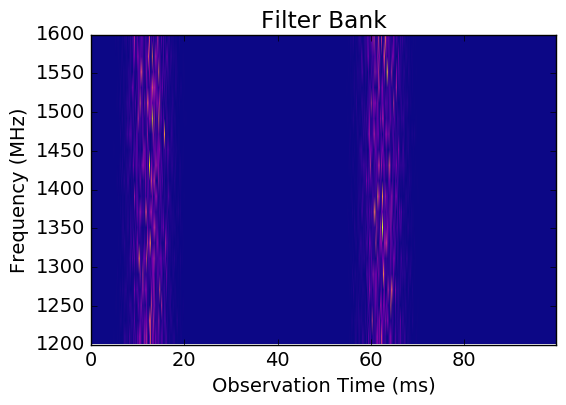

In [9]:
S.filter_bank(N_pulses=2)

In [10]:
ism = PSS.ISM(S)

In [11]:
ism.disperse()

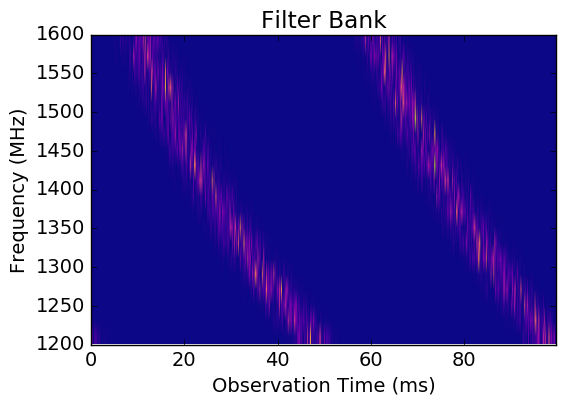

In [12]:
S.filter_bank(N_pulses = 2)

In [13]:
del S,P,ism

Sets our one hundred thousand time bin array to the GUPPI sample rate. GUPPI Sample rate = 20.48 microseconds

In [14]:
sample_size = 20.48e-3
N_Time_Bins = 100000 #One hundred Thousand
Total_time = round(N_Time_Bins*sample_size)
subband =1.5625 
BW=200
N_freq = BW/subband
print('Total_time (ms)',Total_time)
print('N_freq',N_freq)
print('Number of pulses = ',round(Total_time/8.3))

Total_time (ms) 2048
N_freq 128.0
Number of pulses =  247


In [15]:
S1= PSS.Signal(f0=1400, bw=200, Nf=N_freq, Nt=N_Time_Bins)

In [16]:
P1= PSS.Pulsar(S1,period=8.3)

In [17]:
S1.MetaData.__dict__

{'Nf': 128,
 'Nt': 100000,
 'SignalType': 'intensity',
 'TotTime': 200,
 'bw': 200,
 'data_type': 'uint8',
 'f0': 1400,
 'gamma_draw_max': 255,
 'mode': 'explore'}

In [18]:
#Arrays that define gaussian components of average profiles
peak = np.random.randn(S1.Nf*3)*0.03 + 0.2
width = abs(np.random.randn(S1.Nf*3)*0.002 +0.012)
amp = np.random.randn(S1.Nf*3)**2
peak.resize(S1.Nf,3)
width.resize(S1.Nf,3)
amp.resize(S1.Nf,3)
peak

array([[ 0.25991388,  0.23899458,  0.24409417],
       [ 0.20018499,  0.18727744,  0.2011102 ],
       [ 0.17328112,  0.18949397,  0.22615362],
       [ 0.23556961,  0.2352869 ,  0.20226446],
       [ 0.20560934,  0.265951  ,  0.19196241],
       [ 0.21953329,  0.17366453,  0.18194087],
       [ 0.22992452,  0.19125504,  0.23094147],
       [ 0.21032808,  0.22734773,  0.18044558],
       [ 0.21721419,  0.21903525,  0.13721826],
       [ 0.24019686,  0.22743913,  0.21942959],
       [ 0.14386756,  0.21664511,  0.18152891],
       [ 0.17048518,  0.22908773,  0.21344103],
       [ 0.21189513,  0.19310013,  0.25022676],
       [ 0.21910583,  0.15914427,  0.15779638],
       [ 0.19751685,  0.2087658 ,  0.16014014],
       [ 0.19763684,  0.22576836,  0.20881056],
       [ 0.20574859,  0.233761  ,  0.18966136],
       [ 0.15107143,  0.19358626,  0.22911475],
       [ 0.19702968,  0.19053179,  0.17198619],
       [ 0.20747509,  0.19862895,  0.18754125],
       [ 0.17994792,  0.14898456,  0.138

In [19]:
P1.gauss_template(peak=peak,width=width,amp=amp)

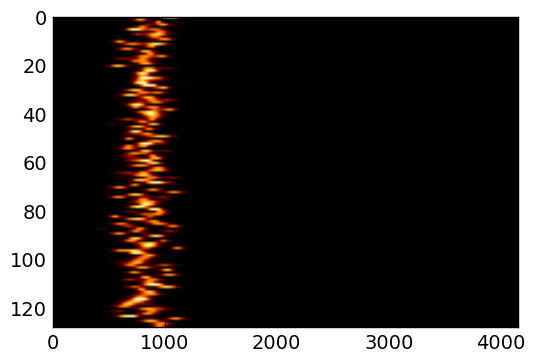

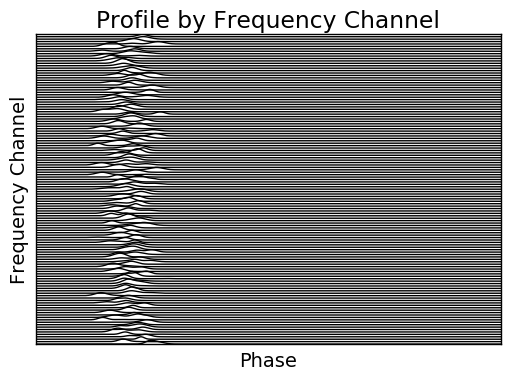

In [20]:
imshow(P1.profile,aspect='auto',cmap=Cmap)
show()
ProfilePlot(P1.profile,1,N=S1.Nf)

## <center> Average Profile </center>

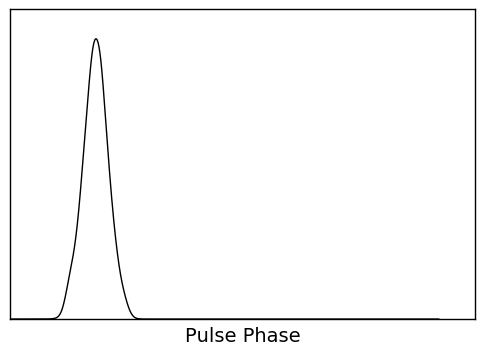

In [21]:
plot(np.sum(P1.profile,axis=0),c='k')
xticks([])
yticks([])
xlabel('Pulse Phase')
show()

In [22]:
P1.make_pulses()

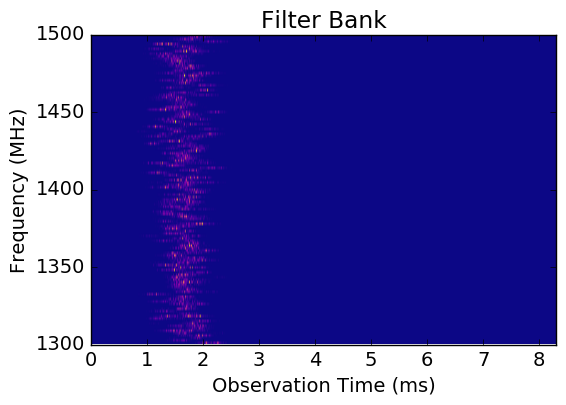

In [23]:
S1.filter_bank()

In [24]:
S1.MetaData.__dict__.keys()

dict_keys(['gamma_scale', 'Nf', 'SignalType', 'gamma_shape', 'signal_pulsed', 'bw', 'width', 'pulsar_period', 'Nt', 'mode', 'amplitude', 'peak', 'TotTime', 'gamma_draw_norm', 'profile', 'nBins_per_period', 'data_type', 'f0', 'gamma_draw_max', 'Profile'])

In [25]:
del S1, P1

In [37]:
S2=PSS.Signal(f0=1400,bw=200,Nf=N_freq,Nt=N_Time_Bins)
P2=PSS.Pulsar(S2,period=8.3)
DM1 = 40 #Here we change the DM to 

In [38]:
P2.gauss_template()

#### Convolve our Filterbank Signal with a top hat to mimic dispersion broadening  (Cassidy Wagner)

In [39]:
for ii,freq in enumerate(S2.freq_Array):
    nbins = int(PSS.utils.top_hat_width(S2.freqBinSize,freq,DM1)//S2.TimeBinSize)
    P2.profile[ii,:] = sp.signal.convolve(P2.profile[ii,:], sp.signal.boxcar(nbins)/nbins, mode='same',method='fft')

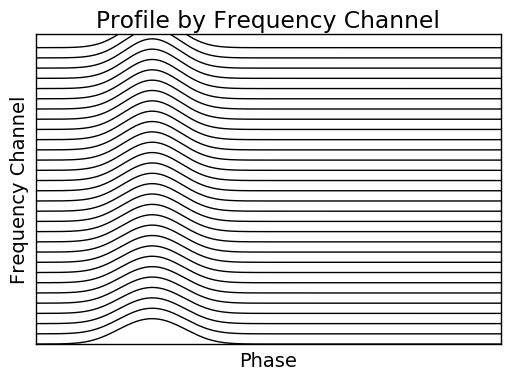

In [40]:
ProfilePlot(P2.profile,N=30,step=0.3)

In [41]:
P2.gauss_template(peak=peak,width=width,amp=amp)
P2.make_pulses()

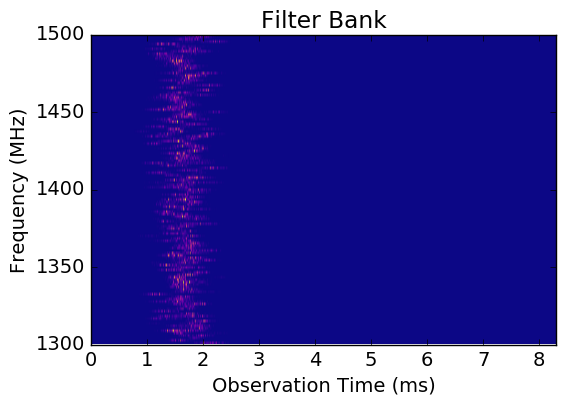

In [42]:
S2.filter_bank()

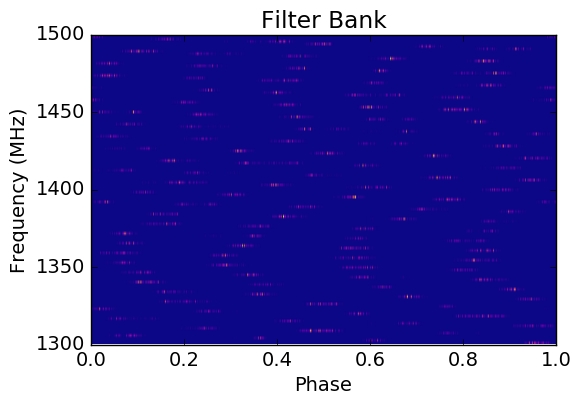

In [59]:
ism1=PSS.ISM(S2,DM=DM1)
ism1.disperse()
S2.filter_bank(phase=True)

In [60]:
del S2,P2

In [61]:
S3=PSS.Signal(f0=1400,bw=200,Nt=N_Time_Bins,SignalType='voltage')
P3=PSS.Pulsar(S3,period=8.3)
P3.gauss_template([0.15,0.22],[.01,.02],[.01,.02])

In [62]:
P3.make_pulses()

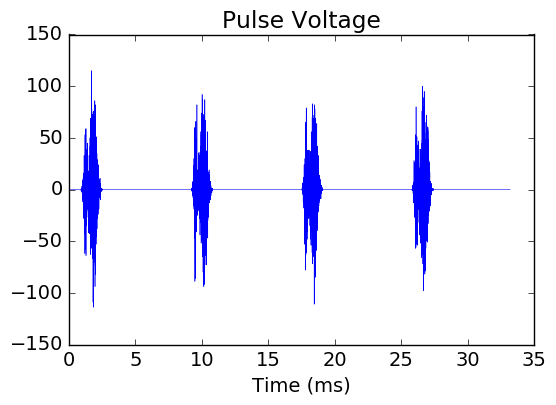

In [63]:
S3.pulse_plot(N_pulses=4)

## <center> Dispersed Baseband Signal (Amelia Henkel)  </center>
<img src="./DispersedPulses.png" style="width: 400px;" />

In [64]:
del S3,P3,ism1

In [65]:
S4 = PSS.Signal(f0=324, bw=6, Nf=250, Nt=12000,\
                TotTime = 1200, SignalType='intensity', data_type='int8')
P4 = PSS.Pulsar(S4, period=20)
dims = 200
DM = 22
Range = [0, S4.Nf//2, S4.Nf-1]
Phase_Screen = PSS.phase_screen(S4, scint_param_model='Bhat',DM=DM, Nx = 4*dims, Ny = dims, Number_r_F=1/128.)

Central Frequency decorrelation Bandwidth =  0.042  MHz


In [66]:
Gain1 = PSS.images(Phase_Screen,S4,mode='explore')

## References

Cordes et al.(1986); Coles et al. (1987); Foster & Cordes (1990); Hu et al. (1991) and Coles et al. (2010)

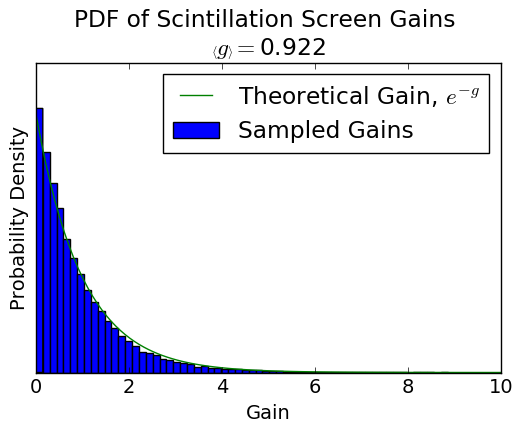

In [67]:
Gain1.gain_pdf()

# Scattering Realization

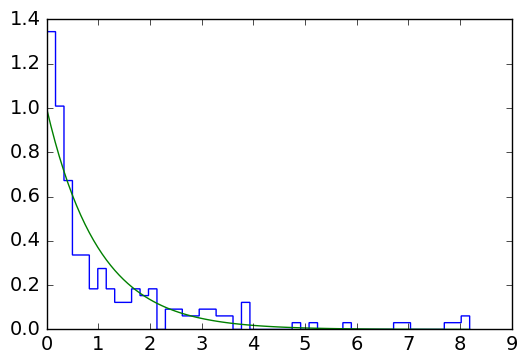

In [73]:
finite_sample = Gain1.gain[3,:200,100]
t=np.linspace(0,finite_sample.max(),100)
hist(finite_sample,bins=50,histtype='step',normed=True)
plot(t,np.exp(-t))
show()

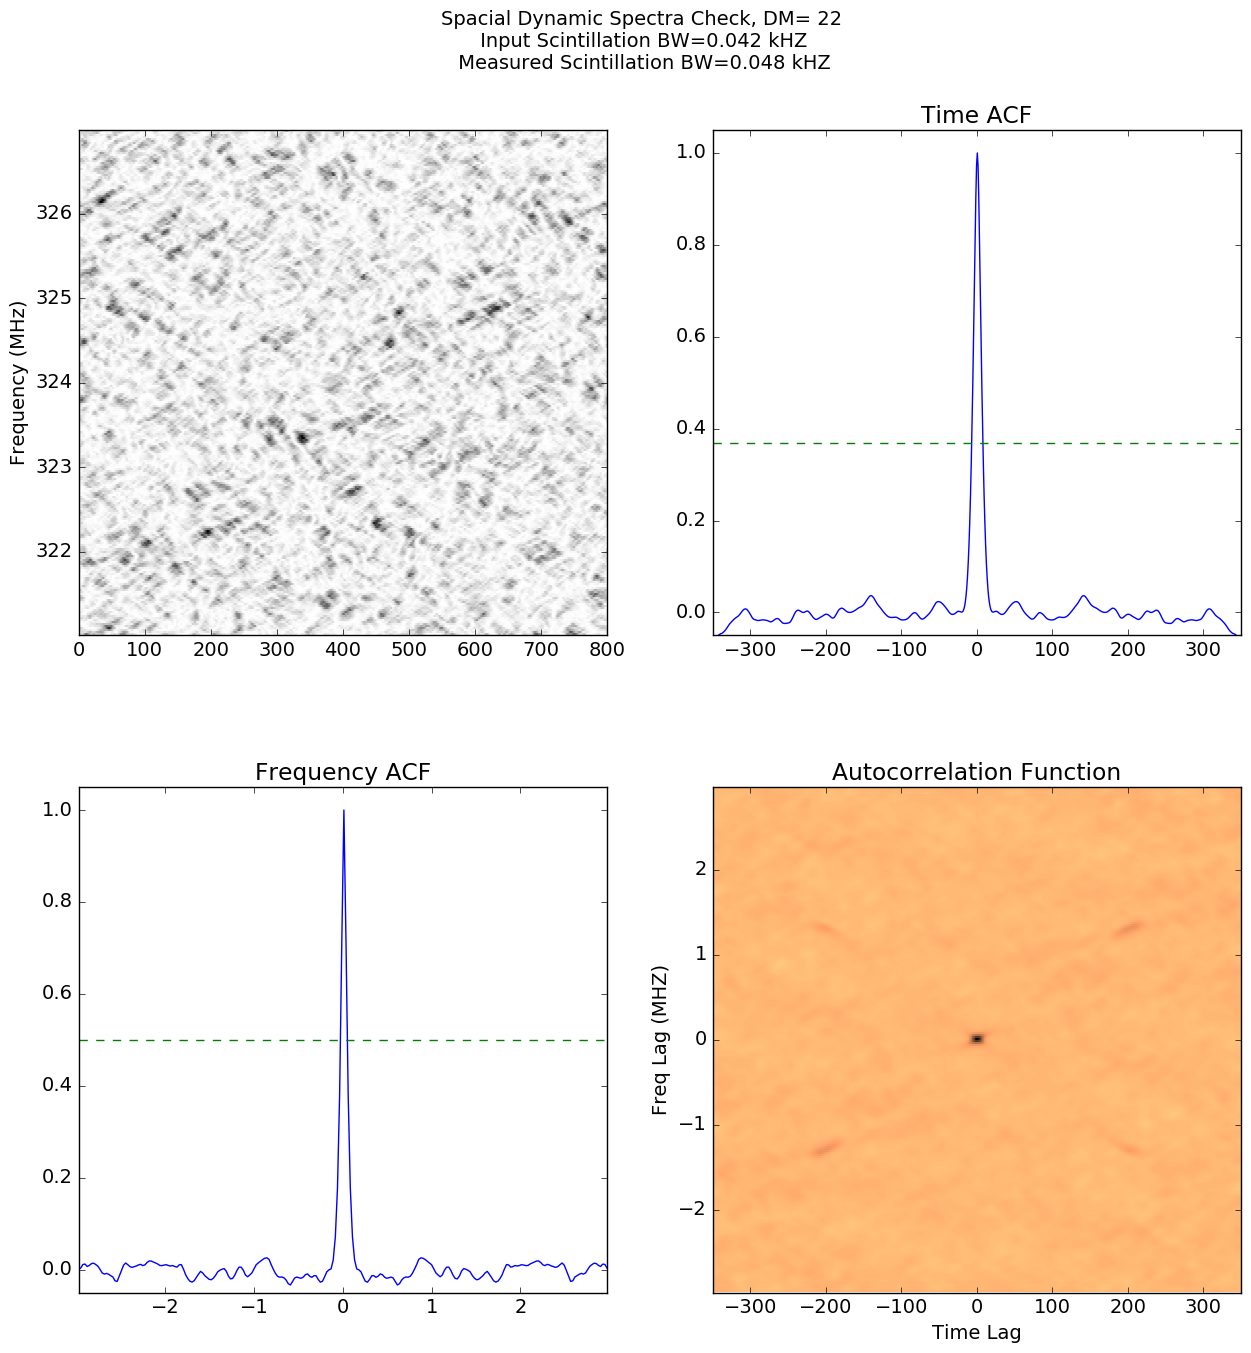

In [74]:
Gain1.dynamic_spectrum(S4)

In [75]:
del S4,P4

In [76]:
J1713_profiles = np.load('J1713+0747_pulses.npy')
#J2145_profiles = np.load('J2145-0750_pulses.npy')
J1713_profiles /= J1713_profiles.max()
#J2145_profiles /= J2145_profiles.max()

In [77]:
S5= PSS.Signal(f0=820,bw=200,Nf=len(J1713_profiles[:,0]),Nt=N_Time_Bins,TotTime=Total_time,mode='simulate')
P5= PSS.Pulsar(S5,period=(1/218.8)*1e3)

In [78]:
S5.TotTime

2048

In [79]:
P5.user_template(J1713_profiles)

User supplied template has been downsampled.
Input array length=  2048 . Pulse template length=  223 .


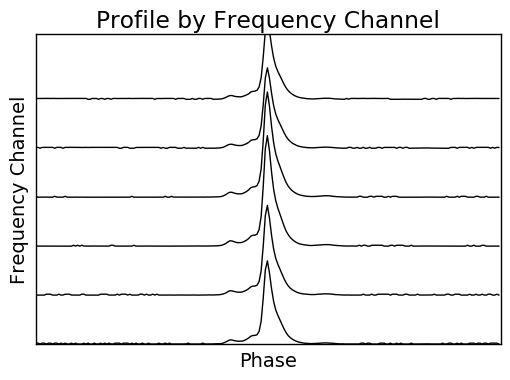

In [81]:
ProfilePlot(P5.profile,step=0.3, N=[20,45,70,90,110,111])

In [82]:
ISM5 = PSS.ISM(S5,mode='simulate')
ISM5.DM = 15.990354 # From J1713+0747 .par file. 
ISM5.finalize_ism()

In [83]:
Scint5 = PSS.scintillate(S5,to_use_NG_pulsar=True,\
                         pulsar='J1713+0747',telescope='GBT',freq_band=820)

Central Frequency decorrelation Bandwidth =  1.48  MHz


In [84]:
#Scint6 = PSS.scintillate(S5,scint_timescale=0.1,scint_bw=1.48)

Central Frequency decorrelation Bandwidth =  1.48  MHz


In [94]:
Simul5 = PSS.Simulation(S5,P5,ISM5,Scint5)

In [95]:
Sim1a = Simul5.simulate()
#This will all be command line accessible...

scint_samples_per_obs 204.0
scint_end_bin 2040.0


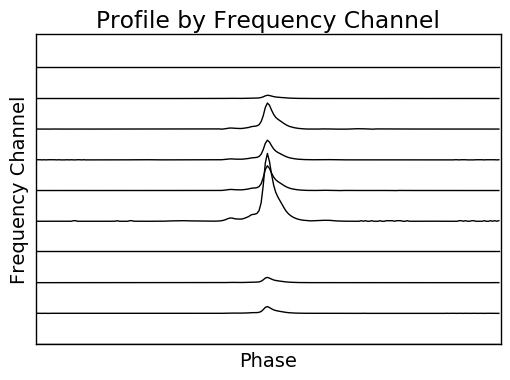

In [88]:
ProfilePlot(P5.profile)

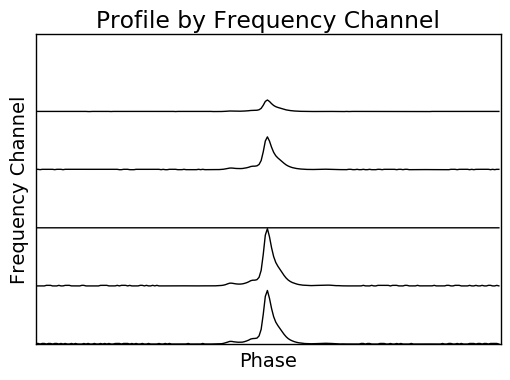

In [274]:
#ProfilePlot(P5.profile*Scint5.gain[:,5,np.newaxis],step=0.3, N=[20,45,70,110,111])

In [89]:
def dynamic_spectrum(signal_object,integration_length=1): #integration length in seconds
    N_integrations = int(signal_object.TotTime*1e-3//integration_length)
    print('N_integrations',N_integrations)
    n_bins_integrate = int(integration_length*1e3 // signal_object.TimeBinSize)
    print('n_bins_integrate',n_bins_integrate)
    dynamic_spectra = np.zeros((signal_object.Nf,N_integrations))
    for ii in range(N_integrations):
        dynamic_spectra[:,ii] = np.sum(signal_object.signal[:,ii*n_bins_integrate:(ii+1)*n_bins_integrate],axis=1)
    return dynamic_spectra

In [96]:
DS5 = dynamic_spectrum(S5,integration_length=0.05)

N_integrations 40
n_bins_integrate 2441


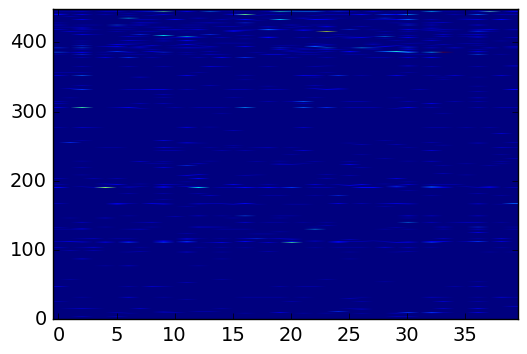

In [97]:
imshow(DS5,origin='left',aspect='auto')

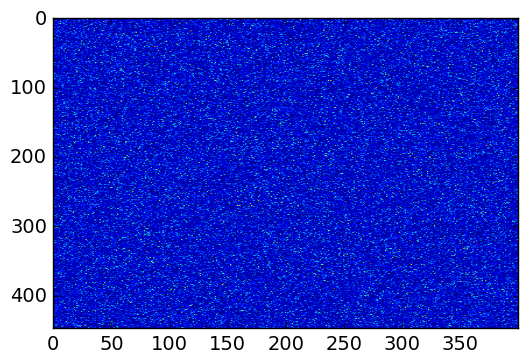

In [98]:
#imshow(Scint5.gain,aspect='auto')

## Remember, this simulator is meant to be flexible... FRBs !!

<img src="./dispersed_burst.png" style="width: 500px;" />

## Looking Forward (In no particular order)
1. Visualization (`Bokeh`, thanks to Aditya)
2. Timing model
3. Command Line access
4. Python Class Factories
5. Version 1.0 release in Fall 2017
6. More Amplitude Modulated Noise Distribution Choices

# <center> Please Join Us! </center>
## <center> (IPTA Simulator ?) </center>

Note to beat a dead horse, but...<img src="./Horse_and_Man.jpg" style="width: 220px;" />

 ### The simulator development is still plastic. Many of you have strong opinions about pulsar software. I would really like to here what you have to say _before_ the simulator has been fully... _fleshed out_.

In [154]:
#Unless you want to tell me to code it in c...